# Explore LHC dataset

In [29]:
%matplotlib inline

import sys
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import logging
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import OPTICS, DBSCAN
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from matplotlib.animation import FuncAnimation
#from ripser import ripser
#from persim import plot_diagrams

logging.basicConfig(
    format="%(asctime)-5.5s %(name)-30.30s %(levelname)-7.7s %(message)s",
    datefmt="%H:%M",
    level=logging.INFO,
)

sys.path.append("../../")
from experiments.datasets import WBFLoader, WBF40DLoader
import plot_settings as ps


In [11]:
ps.setup()

## Get data

In [3]:
n = 10000

In [4]:
sim = WBFLoader()
sim40d = WBF40DLoader()

In [13]:
x, params = sim.load_dataset(train=True, dataset_dir="../data/samples/lhc", numpy=True, limit_samplesize=n)
x_ = sim._preprocess(x, inverse=True)
x_noise = np.random.normal(size=x.shape)

x40d, _ = sim40d.load_dataset(train=True, dataset_dir="../data/samples/lhc40d", numpy=True, limit_samplesize=n)
x40d_noise = np.random.normal(size=x40d.shape)
x40d_test, _ = sim40d.load_dataset(train=False, dataset_dir="../data/samples/lhc40d", numpy=True, limit_samplesize=n)
x40d_test2, _ = sim40d.load_dataset(train=False, dataset_dir="../data/samples/lhc40d", numpy=True, limit_samplesize=n, true_param_id=2)
x40d_test1, _ = sim40d.load_dataset(train=False, dataset_dir="../data/samples/lhc40d", numpy=True, limit_samplesize=n, true_param_id=1)
x40d_mfmf = np.load("../data/results/mf_14_lhc40d_june_samples.npy")
x40d_mfmf2 = np.load("../data/results/mf_14_lhc40d_june_samples_trueparam2.npy")
x40d_mfmf1 = np.load("../data/results/mf_14_lhc40d_june_samples_trueparam1.npy")
x40d_mfmd_reco = np.load("../data/results/mf_14_lhc40d_june_run8_model_x_reco_test.npy")
logp_mfmd_reco = np.load("../data/results/mf_14_lhc40d_june_run8_model_x_reco_test.npy")
x40d_af = np.load("../data/results/flow_14_lhc40d_june_samples.npy")
x40d_af2 = np.load("../data/results/flow_14_lhc40d_june_samples_trueparam2.npy")
x40d_af1 = np.load("../data/results/flow_14_lhc40d_june_samples_trueparam1.npy")


16:49 experiments.datasets.collider  INFO    Only using 10000 of 1000000 available samples
16:49 experiments.datasets.collider  INFO    Only using 10000 of 1000000 available samples
16:49 experiments.datasets.collider  INFO    Only using 10000 of 10000 available samples
16:49 experiments.datasets.collider  INFO    Only using 10000 of 10000 available samples
16:49 experiments.datasets.collider  INFO    Only using 10000 of 10000 available samples


## PCA

In [ ]:
pca = PCA(n_components=48)
pca.fit(x)

explained_var = pca.explained_variance_ratio_


In [ ]:
plt.figure(figsize=(5,5))

plt.plot(np.arange(1, 48.5), explained_var, ls=" ", marker="o", ms=5.)

plt.ylim(0.,None)
plt.xlabel("PCA component")
plt.ylabel("Explained variance ratio")

plt.tight_layout()
plt.show()


## t-SNE

In [ ]:
x_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000).fit_transform(x40d)
noise_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000).fit_transform(x40d_noise)


In [ ]:
x_reshuffled = np.copy(x40d)
idx = np.random.rand(*x_reshuffled.shape).argsort(0)
x_reshuffled = x_reshuffled[idx, np.arange(x_reshuffled.shape[1])]

x_reshuffled_tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=1000).fit_transform(x_reshuffled)


In [ ]:
plt.figure(figsize=(12, 4))

ax = plt.subplot(1,3,1)
plt.scatter(
    x_tsne[:, 0],
    x_tsne[:, 1],
    s=12.0,
    alpha=0.15,
    c="C0"
)
# plt.scatter(
#     x_tsne[x40d[:,16]>0.][:, 0],
#     x_tsne[x40d[:,16]>0.][:, 1],
#     s=12.0,
#     alpha=0.15,
#     c="C0"
# )
# plt.scatter(
#     x_tsne[x40d[:,16]<0.][:, 0],
#     x_tsne[x40d[:,16]<0.][:, 1],
#     s=12.0,
#     alpha=0.15,
#     c="C1"
# )
plt.xlabel("t-SNE component 0")
plt.ylabel("t-SNE component 1")

ax = plt.subplot(1,3,2)
plt.scatter(
    x_reshuffled_tsne[:, 0],
    x_reshuffled_tsne[:, 1],
    s=12.0,
    alpha=0.15,
    c="C2"
)
plt.xlabel("t-SNE component 0")
plt.ylabel("t-SNE component 1")

ax = plt.subplot(1,3,3)
plt.scatter(
    noise_tsne[:, 0],
    noise_tsne[:, 1],
    s=12.0,
    alpha=0.15,
    c="C4"
)
plt.xlabel("t-SNE component 0")
plt.ylabel("t-SNE component 1")

plt.tight_layout()
plt.savefig("../figures/lhc_tsne.pdf")

In [ ]:
npanels = 40
ncols = 6
nrows = (npanels - 1) // ncols + 1

plt.figure(figsize=(ncols * 3, nrows * 3))

for i in range(npanels):
    ax = plt.subplot(nrows,ncols,i+1)
    plt.scatter(
        x_tsne[x40d[:,i]>0.][:250, 0],
        x_tsne[x40d[:,i]>0.][:250, 1],
        s=12.0,
        c="C0"
    )
    plt.scatter(
        x_tsne[x40d[:,i]<0.][:250, 0],
        x_tsne[x40d[:,i]<0.][:250, 1],
        s=12.0,
        c="C1"
    )
    plt.title("Feature {}".format(i))
    plt.xlabel("t-SNE 0")
    plt.ylabel("t-SNE 1")

plt.tight_layout()
plt.savefig("../figures/lhc_tsne_features.pdf")

## OPTICS and DBSCAN

In [ ]:
np.mean(x40d, axis=0)

In [ ]:
# clustering = OPTICS(eps=1., min_samples=5).fit(x)

epsilons = [0.1, 0.2, 0.5, 1., 2., 5., 10., 20., 50., 100.]
clusterings = [DBSCAN(eps=eps, min_samples=5).fit(x40d) for eps in epsilons]

In [ ]:
cluster_fracs = [np.array([np.sum(cl.labels_ == i) for cl in clusterings]) / len(x40d) for i in [0, 1, 2, 3, 4, -1]]
labels = [f"Cluster {i+1}" for i in range(5)] + ["Noise"]


In [ ]:
plt.figure(figsize=(5,5))

for cluster_frac, label in zip(cluster_fracs, labels):
    if "Noise" in label:
        plt.plot(epsilons, cluster_frac, label=label, c="0.6", ls="--")
    else:
        plt.plot(epsilons, cluster_frac, label=label)

plt.legend()

plt.ylim(0., 1.05)
plt.xscale("log")

plt.xlabel(r"$\epsilon$")
plt.ylabel("Fraction of samples")

plt.tight_layout()
plt.savefig("../figures/lhc_dbscan.pdf")


## TDA: persistent cohomology

In [ ]:
diagrams48d = ripser(x, maxdim=2)['dgms']
plot_diagrams(diagrams48d, show=False)
plt.savefig("../figures/lhc_persistent_homology_48d.pdf")

In [ ]:
diagrams = ripser(x40d, maxdim=2)['dgms']
plot_diagrams(diagrams, show=False)
plt.savefig("../figures/lhc_persistent_homology.pdf")

## Determine weights for individual closure tests

In [ ]:
random_closure_tests = np.mean(sim._closure_tests(x_noise), axis=1)
CLOSURE_TEST_WEIGHTS = 1. / random_closure_tests
print(", ".join([str(w) for w in CLOSURE_TEST_WEIGHTS]))

## Closure test vs noise

In [ ]:
np.mean(sim.distance_from_manifold(x)), np.mean(sim.distance_from_manifold(x_noise))

In [ ]:
np.mean(sim40d.distance_from_manifold(x40d)), np.mean(sim40d.distance_from_manifold(x40d_noise))

In [ ]:
noises = np.geomspace(1.e-9, 1., 100)

closure = []

for noise in noises:
    closure.append(np.mean(sim.distance_from_manifold(x + noise * np.random.normal(size=x.shape))))

In [ ]:
plt.figure(figsize=(5,5))

plt.plot(noises, closure)

plt.xscale("log")
plt.yscale("log")

plt.xlabel("Noise")
plt.ylabel("Mean closure")

plt.tight_layout()
plt.savefig("../figures/lhc_closure_vs_noise.pdf")


## Marginals

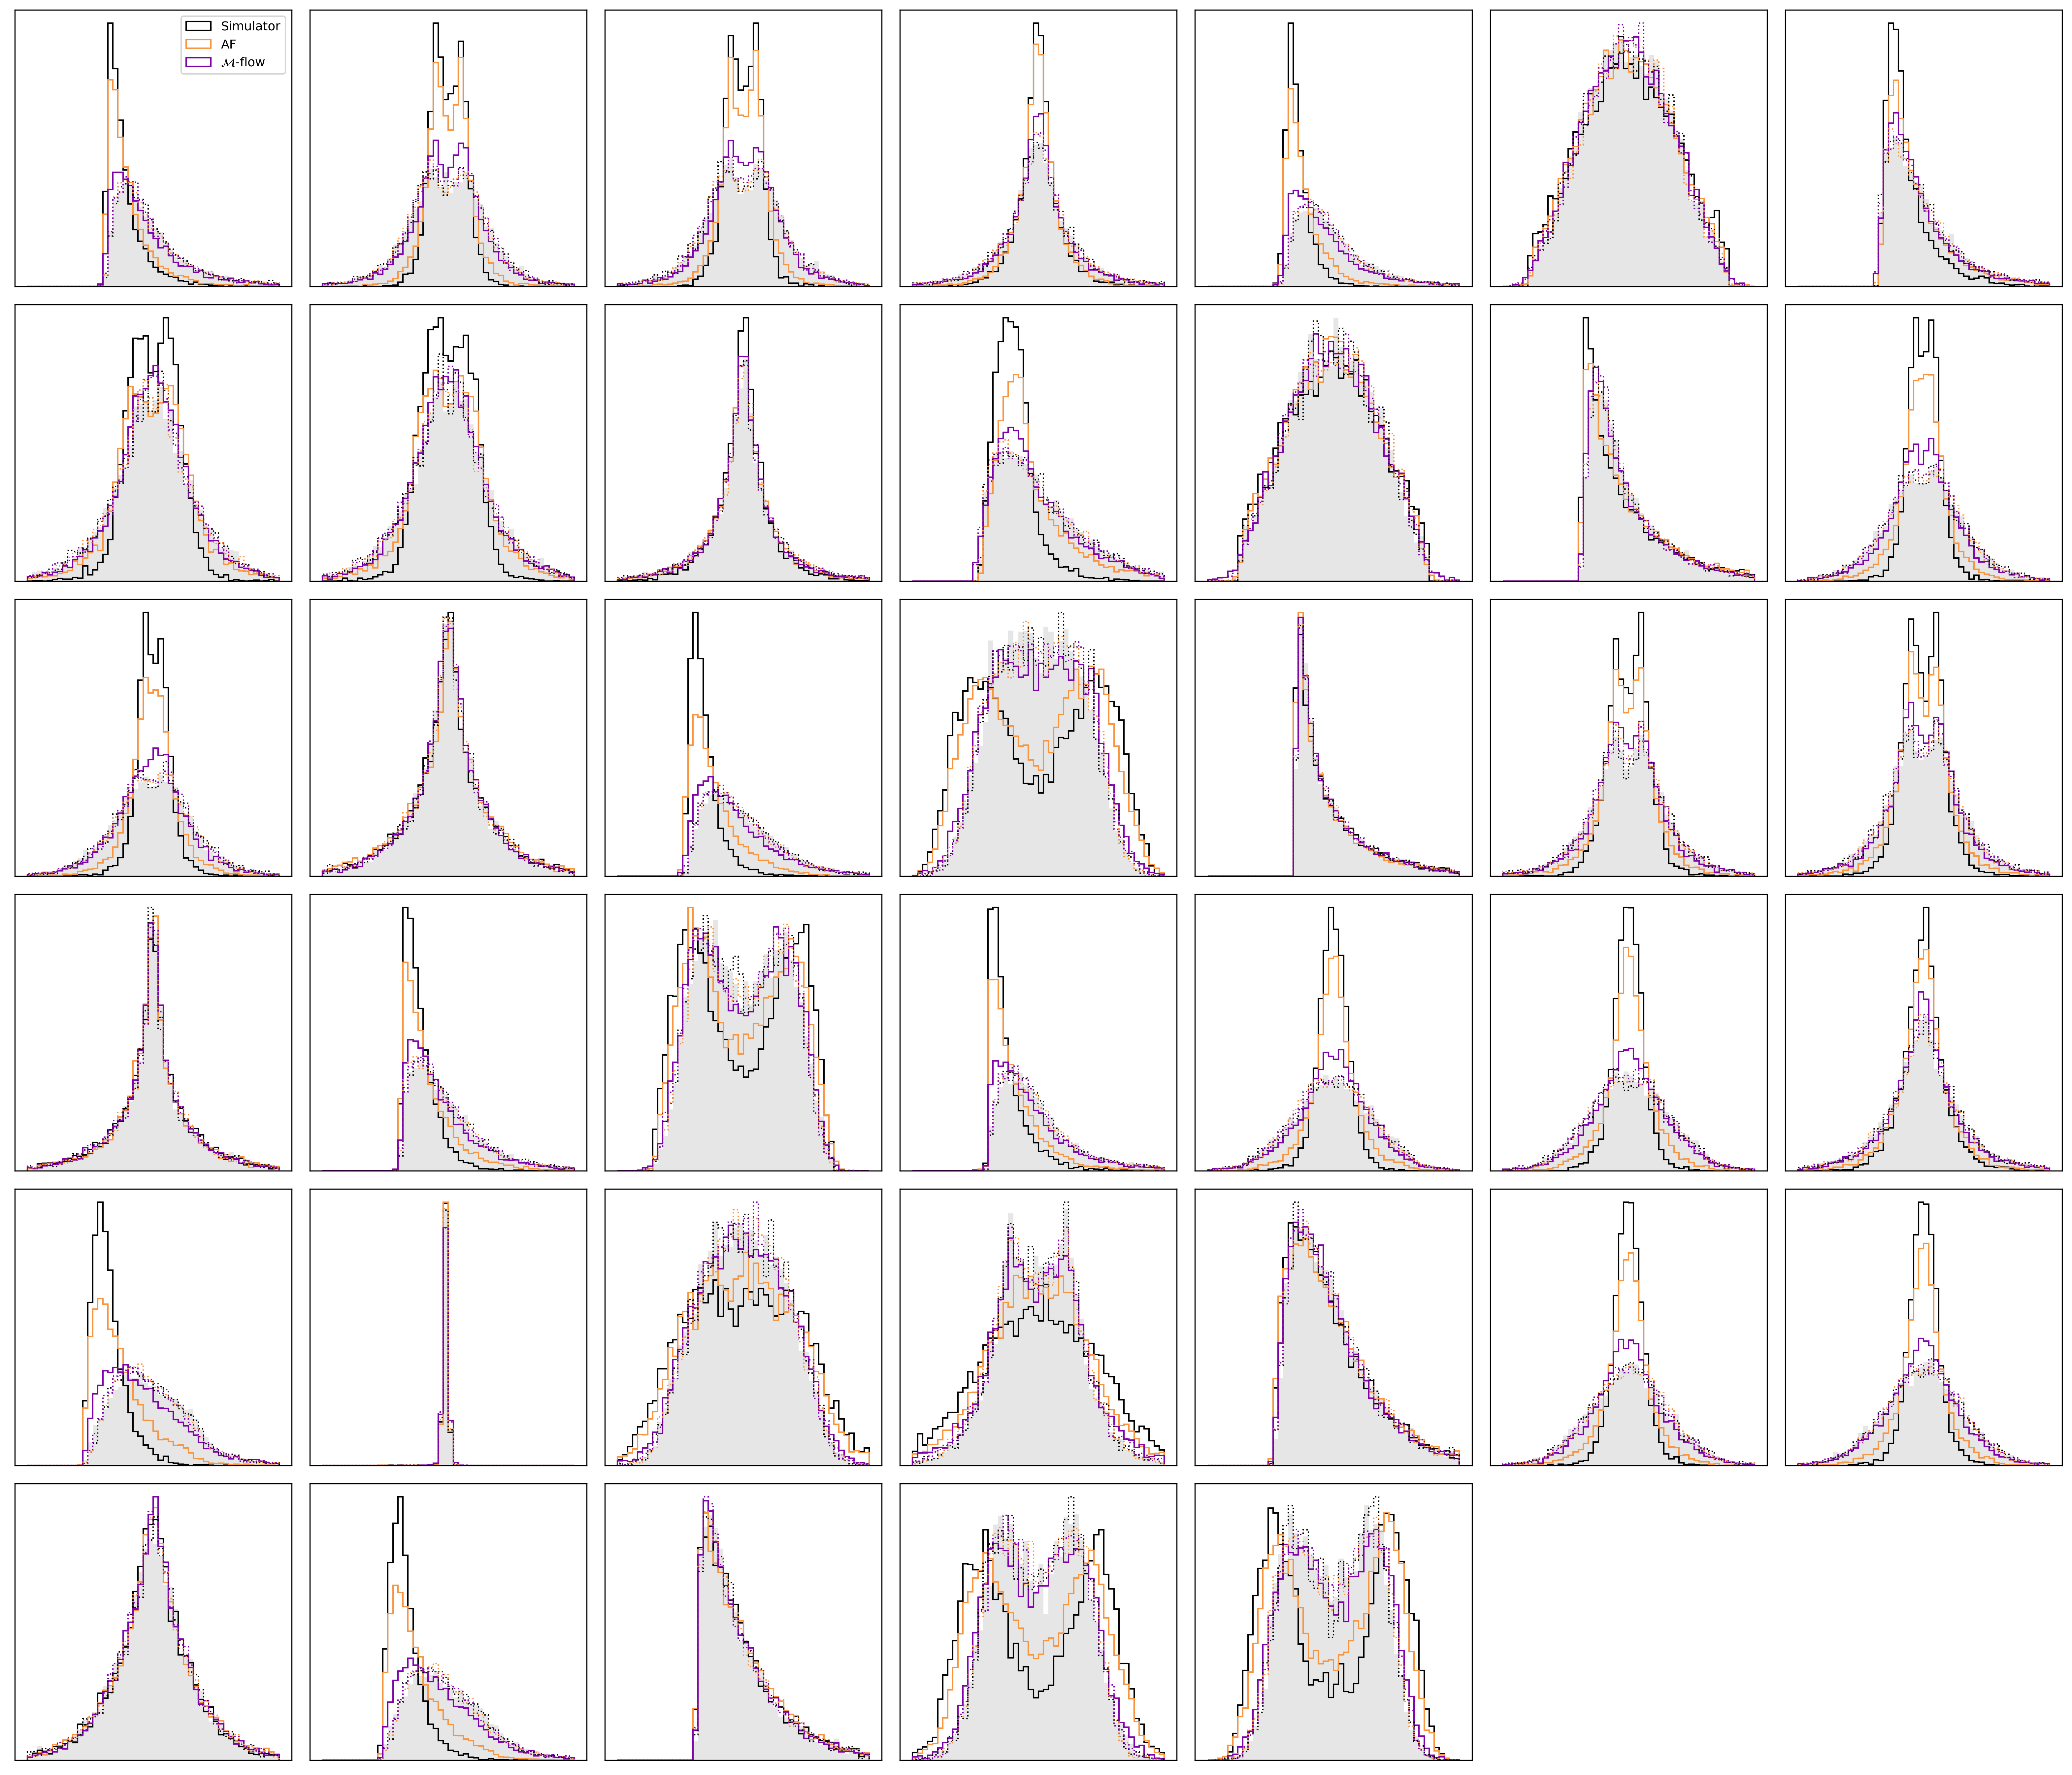

In [9]:
ncols = 7
nrows = 6

fig = plt.figure(figsize=(3*ncols, 3*nrows))

for i in range(40):
    ax = plt.subplot(nrows, ncols, i+1)
    plt.hist(x40d[:,i], range=(-3,3), bins=50, density=True, color="0.9")
    
    plt.hist(
        x40d_test[:,i], range=(-3,3), bins=50, density=True,
        histtype="step", color="black", ls="-", lw=1., label="Simulator"
    )
    plt.hist(
        x40d_af[:,i], range=(-3,3), bins=50, density=True,
        histtype="step", color=[ps.COLOR_AF], ls="-", lw=1., label="AF"
    )
    plt.hist(
        x40d_mfmf[:,i], range=(-3,3), bins=50, density=True,
        histtype="step", color=[ps.COLOR_FLMA], ls="-", lw=1., label="$\mathcal{M}$-flow"
    )
    
    plt.hist(
        x40d_test2[:,i], range=(-3,3), bins=50, density=True,
        histtype="step", color="black", ls=":", lw=1.
    )
    plt.hist(
        x40d_af2[:,i], range=(-3,3), bins=50, density=True,
        histtype="step", color=[ps.COLOR_AF], ls=":", lw=1.
    )
    plt.hist(
        x40d_mfmf2[:,i], range=(-3,3), bins=50, density=True,
        histtype="step", color=[ps.COLOR_FLMA], ls=":", lw=1.
    )
    
    if i == 0:
        plt.legend()
    
    ax.get_xaxis().set_ticks([])
    ax.get_yaxis().set_ticks([])
    
plt.tight_layout()
plt.savefig("../figures/lhc_features_histos.pdf")


## Scatter plots of features

In [ ]:
features = list(range(40))
n = len(features)
m = 100

fig = plt.figure(figsize=(1*(n-1), 1*(n-1)))
for ip, i in enumerate(features[1:]):
    for jp in range(ip):
        j = features[jp]
        ax = plt.subplot(n-1, n-1, ip*(n-1) + jp + 1)
        # plt.scatter(x40d[:m,j], x40d[:m,i], s=2., c=["0.5"], rasterized=True)
        plt.scatter(x40d_test[:m,j], x40d_test[:m,i], s=2., c=["black"], rasterized=True)
        # plt.scatter(x40d_af[:m,j], x40d_af[:m,i], s=2., c=[ps.COLOR_AF], rasterized=True)
        plt.scatter(x40d_mfmf[:m,j], x40d_mfmf[:m,i], s=2., c=[ps.COLOR_FLMA], rasterized=True)
        ax.get_xaxis().set_ticks([])
        ax.get_yaxis().set_ticks([])
        plt.xlim(-2.5,2.5)
        plt.ylim(-2.5,2.5)
        
        if ip == n - 2:
            plt.xlabel(str(j))
        if jp == 0:
            plt.ylabel(str(i))
        
plt.tight_layout()
plt.savefig("../figures/lhc_features_scatter.pdf")


## Illustrative 3D plots

In [8]:
# Features:
# 0 e_a1
# 1 px_a1
# 2 py_a1
# 3 pz_a1
# 4 pt_a1
# 5 eta_a1
# 6 e_a2
# 7 px_a2
# 8 py_a2
# 9 pz_a2
# 10 pt_a2
# 11 eta_a2
# 12 e_j1
# 13 px_j1
# 14 py_j1
# 15 pz_j1
# 16 pt_j1
# 17 eta_j1
# 18 e_j2
# 19 px_j2
# 20 py_j2
# 21 pz_j2
# 22 pt_j2
# 23 eta_j2
# 24 e_aa
# 25 px_aa
# 26 py_aa
# 27 pz_aa
# 28 pt_aa
# 29 m_aa
# 30 eta_aa
# 31 deltaeta_aa
# 32 e_jj
# 33 px_jj
# 34 py_jj
# 35 pz_jj
# 36 pt_jj
# 37 m_jj
# 38 eta_jj
# 39 deltaeta_jj

17:17 matplotlib.animation           INFO    Animation.save using <class 'matplotlib.animation.ImageMagickWriter'>
17:17 matplotlib.animation           INFO    MovieWriter.run: running command: ['convert', '-size', '450x450', '-depth', '8', '-delay', '4.0', '-loop', '0', 'rgba:-', '../figures/lhc_data.gif']


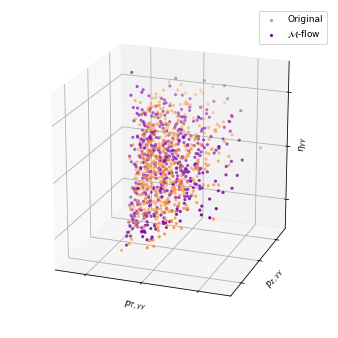

In [38]:
n_frames = 250
interval = 40
show = 500

ix, iy, iz = 28, 27, 30
x_labels = [r"$p_{T,\gamma\gamma}$", "$p_{z,\gamma\gamma}$", "$\eta_{\gamma\gamma}$"]

xs = [x40d, x40d_mfmf]
labels = ["Original", "$\mathcal{M}$-flow"]
colors = [ps.COLOR_AF, ps.COLOR_FLMA]

fig, ax = ps.figure(height=0.5*ps.TEXTWIDTH, cbar=False, make3d=True, large_margin=0.01, small_margin=0.01)
    
for x, c, label in zip(xs, colors, labels):
    filter_ = (np.abs(x[:,0]) < 3.0) * (np.abs(x[:,1]) < 3.0) * (np.abs(x[:,2]) < 3.0)
    ax.scatter(
        x[filter_, :][:show, ix], x[filter_, :][:show, iy], x[filter_, :][:show, iz],
        color=c,
        s=10.0, marker="o", linewidths=0.,
        label=label
    )
    
plt.legend()

ax.set_xlim3d(-3, 3)
ax.set_ylim3d(-3, 3)
ax.set_zlim3d(-3, 3)
ax.set_xticks([-2., 0., 2.])
ax.set_yticks([-2., 0., 2.])
ax.set_zticks([-2., 0., 2.])
ax.set_xticklabels(["", "", ""]) 
ax.set_yticklabels(["", "", ""]) 
ax.set_zticklabels(["", "", ""]) 
ax.set_xlabel(x_labels[0], labelpad=-5.)
ax.set_ylabel(x_labels[1], labelpad=-5.)
ax.set_zlabel(x_labels[2], labelpad=-8.)

ax.view_init(elev=20, azim=70)

def update(t):
    ax.view_init(elev=20, azim=-70 + t * 360. / n_frames)

anim = FuncAnimation(fig, update, frames=np.arange(0, n_frames), interval=interval)
anim.save('../figures/lhc_data.gif', dpi=100, writer='imagemagick')
